# Project: Investigate a Dataset (tmdb-movies.csv)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **The dataset**: I choose tdb-movies.csv dataset it's about 10865 movies. It's contain 10866 rows and 21 columns.
<br> The dataset including the original_title of the movie name , budget, revenue , popularity, director and average_vote.

### Questions:

>1_What is the years tha have the most release numbers of movies? <br>
2_What is change for run time over years? <br>
3_What is the relation between budget and revenue and profit? <br>
4_Which movies with the highest profit? <br>
5_what is the most genres release ?

In [2]:
#import packages
import pandas as pd
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

>load data <br>
know informations about data like data types , its columns , shape and null values
### General Properties

In [3]:
# Load the data
df=pd.read_csv('tmdb-movies.csv')

In [4]:
#first few rows of the dataset
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
#last rows of the data
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [6]:
#dimensions of the dataset
df.shape

(10866, 21)

In [7]:
#information about data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [8]:
#statistics description of the dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [9]:
#data types of each columns
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [10]:
#columns names
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

### Data Cleaning
> 1-remove duplicates <br>
2-remove unuseful columns <br>
3-drop rows with null values <br>
4-replace zeros values in the revenue and budget with the mean of each one

In [11]:
#duplcated rows in the data set
df.duplicated().sum()

1

In [12]:
#remove duplicates
df.drop_duplicates(inplace=True)

In [13]:
#to make sure that no duplicated rows
df.duplicated().sum()

0

In [14]:
df.drop(['homepage','cast','tagline','overview','budget_adj','revenue_adj','imdb_id','keywords','production_companies'],axis=1,inplace=True)
df.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015


In [15]:
df.shape

(10865, 12)

In [16]:
#number of null values in each columns
df.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
dtype: int64

In [17]:
#drop rows with null values
df.dropna(inplace=True)

In [18]:
#make sure that there's no null values
df.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
dtype: int64

In [19]:
#replace zero values of budget with budget mean
budget_mean=df.budget.mean()
df['budget']=df['budget'].replace(0,budget_mean)

In [20]:
#replace zero values of revenue with revenue mean
revenue_mean=df.revenue.mean()
df['revenue']=df['revenue'].replace(0,revenue_mean)

In [21]:
#make sure no zeros in budget and revenue
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10800.000000,10800.000000,1.080000e+04,1.080000e+04,10800.000000,10800.000000,10800.000000,10800.000000
mean,65576.183426,0.649455,2.238817e+07,6.214616e+07,102.189722,218.600741,5.970880,2001.289537
std,91756.079939,1.002441,2.807649e+07,1.113169e+08,30.783873,577.165055,0.933006,12.819545
min,5.000000,0.000188,1.000000e+00,2.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,10570.500000,0.209157,1.471114e+07,4.006558e+07,90.000000,17.000000,5.400000,1995.000000
50%,20460.000000,0.385471,1.471114e+07,4.006558e+07,99.000000,39.000000,6.000000,2006.000000
75%,74725.250000,0.717508,1.564374e+07,4.006558e+07,111.250000,147.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1  (what is the years tha have the most release numbers of movies?)

> **what i did here**:I'm trying to get release number of each year by count number of movies for each one the i describe it in this bar chart to be clear more than alot of numbers and columns

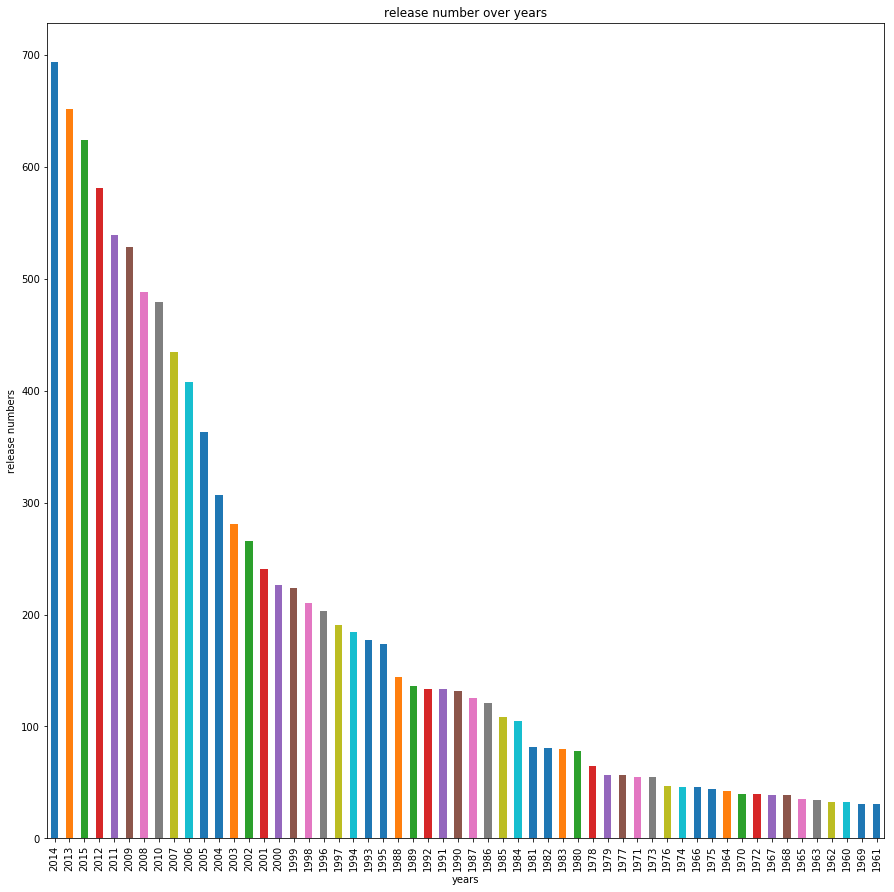

In [22]:
#bar chart show release number of movies over years
df['release_year'].value_counts().plot(kind='bar' , figsize=(15,15), title='release number over years') .set( xlabel="years" , ylabel="release numbers");

>
> **what i did here**: get the histograms of the dataset to know how it distributed

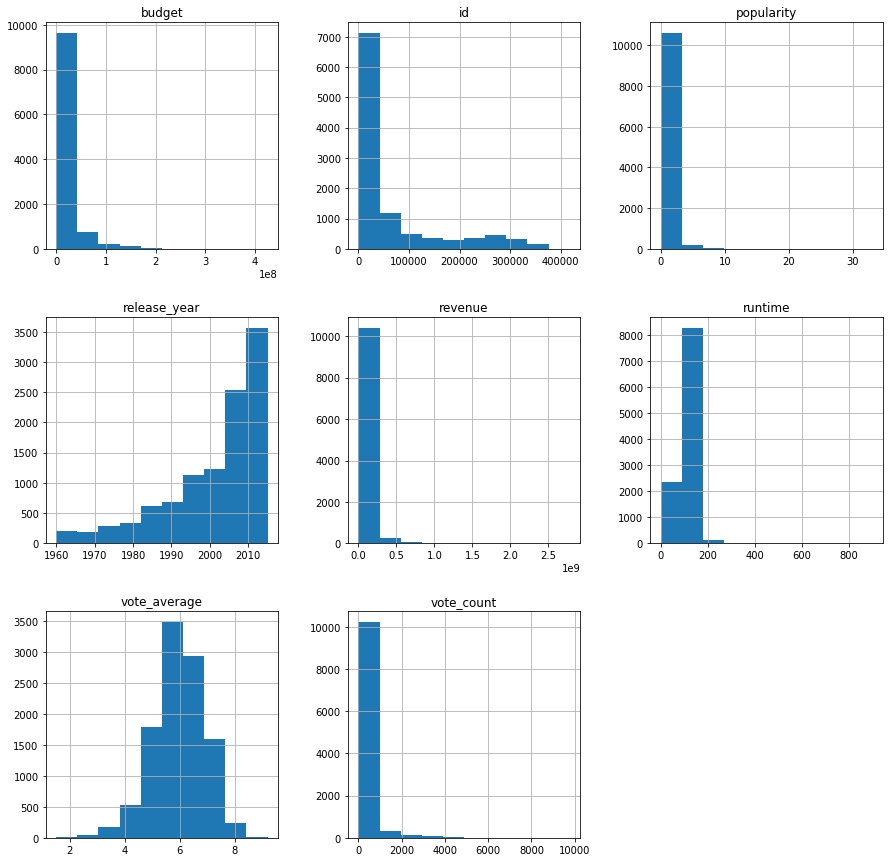

In [23]:
#histograms
df.hist(figsize=(15,15));

### Research Question 2  (what is change for run time over years?)
> **what i did here**: I assume ther is a change in the run time over year so i grouped each of them by geting the mean of run time for each year and describe this relation by this graph

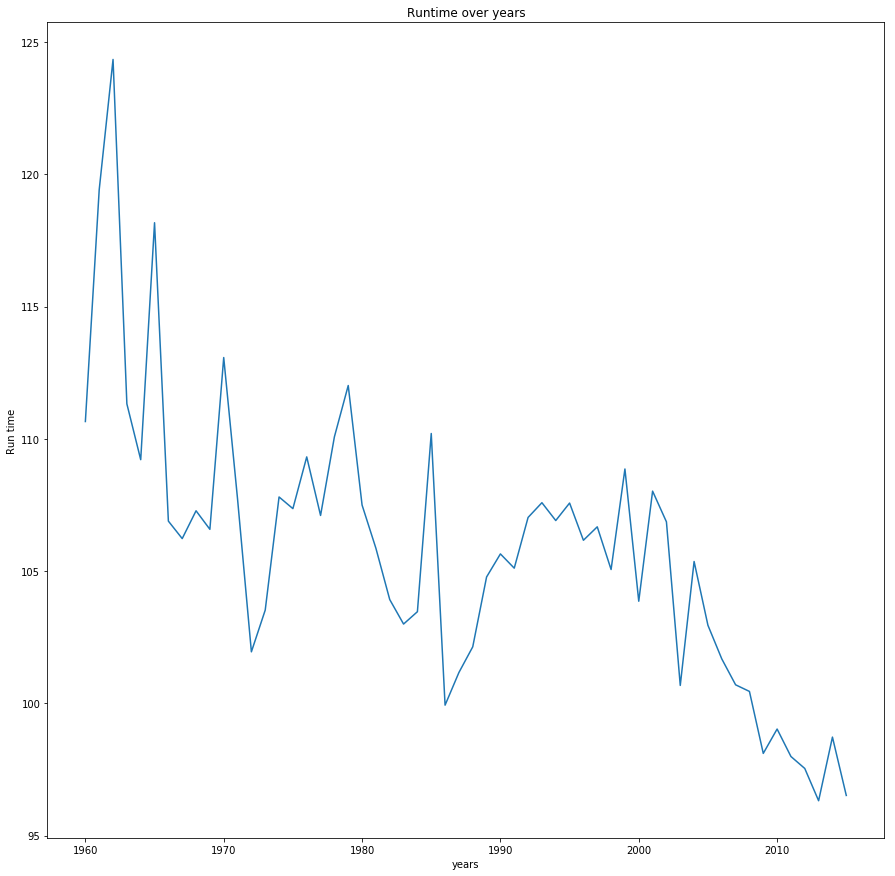

In [24]:
#group of data according to release years and runtime
df.groupby('release_year')['runtime'].mean().plot(figsize=(15,15), title='Runtime over years') .set( xlabel="years" , ylabel="Run time");

### Research Question 3  (what is the relation between budget and revenue and profit?)
> **what i did here**: the assuumption was if there a relationship between the revenue and budget of revenue and profit ?<br> by using scatter plot it's shows me that there's positive corelation between the revenue and budget.then i get the profit by get the subtraction of budget from revenue for each movie and add it as new column in the data. After that i get the scatter plot that show me the relation between thw profit and revenue is strond positive corelation.

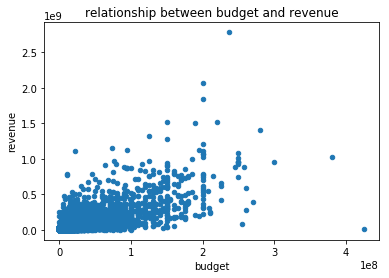

In [25]:
#use scatter plot to show the correlation between the budget and revenue
df.plot(x='budget' , y='revenue' , kind ='scatter' , title='relationship between budget and revenue');

In [26]:
#calculate profit for each movie as a new column in the df
df['profit'] = df['revenue'] - df['budget']

In [27]:
#to make sure the column is added
df.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'director',
       'runtime', 'genres', 'release_date', 'vote_count', 'vote_average',
       'release_year', 'profit'],
      dtype='object')

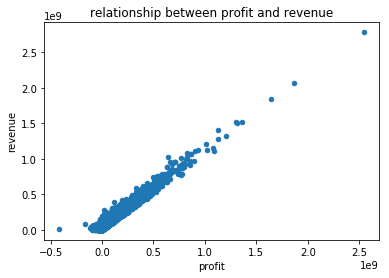

In [28]:
#use scatter plot to show the correlation between the profit and revenue
df.plot(x='profit' , y='revenue' , kind ='scatter' , title='relationship between profit and revenue');

### Research Question 4  (what is the movies with highest profit ?)
> **what i did here**: I want to know the highest profit movie so i get the index of the max profit and shows the title in this index <br>
To know the Top profit movies i sort by the profit descending and get the top movie names

In [28]:
#get the index of max profit movie
high=df['profit'].idxmax()
df['original_title'][high]

'Avatar'

In [29]:
high_profit=df.sort_values(by=['profit'],ascending=False)
high_profit.loc[:5 ,['profit','original_title']]

,profit,original_title
1386,2.544506e+09,Avatar
3,1.868178e+09,Star Wars: The Force Awakens
5231,1.645034e+09,Titanic
0,1.363529e+09,Jurassic World
4,1.316249e+09,Furious 7
4361,1.299558e+09,The Avengers
3374,1.202818e+09,Harry Potter and the Deathly Hallows: Part 2
14,1.125036e+09,Avengers: Age of Ultron
5422,1.124219e+09,Frozen
8094,1.084280e+09,The Net


### Research Question 5  (what is the most genres release ?)
> **what i did here**: i tried to split the genres by ('|') by using assign function to assign new column with geners after splitting then explode these column to make each gener in new row. then i count every genre movies and show it as a pie chart <br>
#### **Note**:it dosen't work in the project workspace here but it work correctly in my local jupyter notebook.I think it because of pandas version  <br> 

In [30]:
#split the genres column in '|' and explode it 
df_split=df.assign(genre=df['genres'].str.split('|')).explode('genre')

In [ ]:
#pie chart that diveded geners according to number of movies release
df_split['genre'].value_counts().plot(kind='pie', figsize=(15,15));

<a id='conclusions'></a>
## Conclusions

> 
- The most year release mvies is 2014 followed by 2014 then 2016
- The run time decreased over years from about 110 min t0 97 min
- revenue and budget have a weak positive correlation
- revenue and profit have a strong positive correlation
- The more revenue the more profit
- Avatar, Star Wars: The Force Awakens and Titanic movies have the highest profits
- Drama is the most released genre, following by comedy, and Thriller..

>**Limitations** 
- cheked about duplictes and it was 1 row then i droped it
- There was a lot of zero values in the budget and revenue columns so i replace it with mean of each of them to avoid losing alot of data.
- I couldn't find any outliers in the data
- there was columns with alot of null values and it wouldn't help me in my analysis so i drop these columns like(homepage , cast , tagline , overview , budget_adj , revenue_adj , imdb_id , keywords , production_companies )
- then i droped the rows with null values.
- by counting the number of released movies each year its show that the most high number of movies released in 2014 then 2015.
- I assume that there's change of run time over years then i found it decreased over years.
- by assuming relation between the revenue and budget and profit , i found that the more revenue, the more profit and there is strong positive correlation between both of them.
- i split geners in ('|') to know the top movie genres released ana i found drama , comedy and thriller.


## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [37]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0